In [30]:
from PIL import Image, ImageFile, ImageOps 
from pathlib import Path
import numpy as np
import os
from tqdm import tqdm
import pandas as pd
import seaborn as sns
import shutil

In [12]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [7]:
path_data = Path('dark_check')
images_filenames = []
for dirpath, dirnames, filenames in os.walk(path_data):
    if len(dirnames)!=0: continue
    images_filenames.extend(
        [str(Path(dirpath) / x) for x in filenames])

In [14]:
means = []
for filename in tqdm(images_filenames):
    img = ImageOps.grayscale(Image.open(filename))
    mean = np.mean(img)
    means.append(mean)

100%|██████████| 1272/1272 [00:27<00:00, 45.75it/s]


In [17]:
df = pd.DataFrame({
    'filename': images_filenames,
    'dark_value': means
})

In [21]:
df['target_dark'] = df['filename'].apply(lambda x: '\\bright\\' not in x)

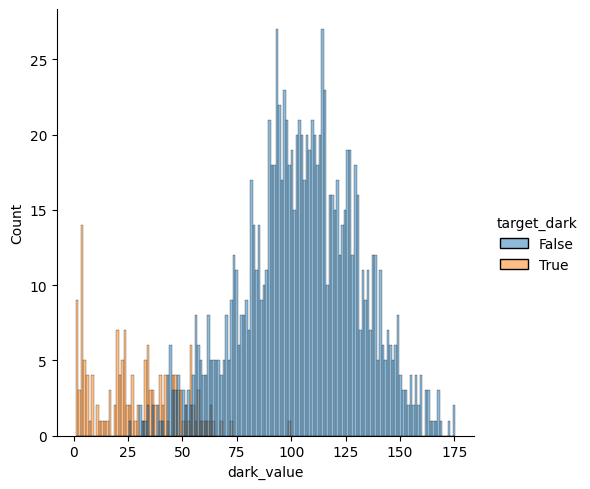

In [25]:
sns.displot(
    data=df,
    x='dark_value', hue='target_dark', bins=150)

In [27]:
df.loc[df['target_dark']==1, 'dark_value'].describe()

count    156.000000
mean      28.731172
std       19.918801
min        1.000152
25%        9.098811
50%       26.218320
75%       45.352425
max       98.830573
Name: dark_value, dtype: float64

In [28]:
df.loc[df['target_dark']==0, 'dark_value'].describe()

count    1116.000000
mean      104.817895
std        26.682285
min        25.662347
25%        89.246837
50%       105.419171
75%       123.633526
max       175.324251
Name: dark_value, dtype: float64

In [45]:
path_cross = Path('dark_cross')
if not os.path.exists(path_cross): os.makedirs(path_cross)
for filename in df.loc[
        (df['target_dark']==True) &
        (df['dark_value']<=50),
    'filename']:
    shutil.copy(filename, path_cross)

In [2]:
n = input().split(' ')
n.sort(reverse=True)
n = ' '.join(n)
print(n)

90 89 6 6 4 23
